Check out my full write up on: https://www.gerardrobertkirwin.com/blog/2021/05/23/how-i-beat-a-supercomputer

In [3]:
import pandas as pd
import numpy as np

In [4]:
christmas = pd.read_csv("10-20 Christmas.csv")
final = pd.read_csv("10-20 Final.csv")
current_year = pd.read_csv("20-21 Test.csv")

In [5]:
christmas["team"] = christmas["Pos"] + ' ' + christmas["Team"]
christmas = christmas.drop(["Pos", "Team"], axis=1)

In [6]:
christmas.head(10)

,Pld,W,D,L,GF,GA,GD,Pts,team
0,17,10,7,0,38,16,22,37,10-11 Manchester United
1,17,10,2,5,34,19,15,32,10-11 Arsenal
2,17,9,5,3,24,13,11,32,10-11 Manchester City
3,17,9,4,4,31,12,19,31,10-11 Chelsea
4,17,7,6,4,25,22,3,27,10-11 Tottenham Hotspur
5,17,5,9,3,20,18,2,24,10-11 Sunderland
6,17,6,8,3,30,24,6,26,10-11 Bolton Wanderers
7,17,6,4,7,27,26,1,22,10-11 Newcastle United
8,17,6,4,7,21,22,-1,22,10-11 Liverpool
9,17,7,4,6,26,29,-3,25,10-11 Blackpool


In [7]:
final["team"] = final["Pos"] + ' ' + final["Team"]
final = final.drop(["Pos", "Team"], axis=1)

In [8]:
final.head(10)

,Pld,W,D,L,GF,GA,GD,Pts,team
0,38,23,11,4,78,37,41,80,10-11 Manchester United
1,38,21,8,9,69,33,36,71,10-11 Chelsea
2,38,21,8,9,60,33,27,71,10-11 Manchester City
3,38,19,11,8,72,43,29,68,10-11 Arsenal
4,38,16,14,8,55,46,9,62,10-11 Tottenham Hotspur
5,38,17,7,14,59,44,15,58,10-11 Liverpool
6,38,13,15,10,51,45,6,54,10-11 Everton
7,38,11,16,11,49,43,6,49,10-11 Fulham
8,38,12,12,14,48,59,-11,48,10-11 Aston Villa
9,38,12,11,15,45,56,-11,47,10-11 Sunderland


In [9]:
data = christmas.merge(final, how='inner', on='team')

In [10]:
data.head(20)

,Pld_x,W_x,D_x,L_x,GF_x,GA_x,GD_x,Pts_x,team,Pld_y,W_y,D_y,L_y,GF_y,GA_y,GD_y,Pts_y
0,17,10,7,0,38,16,22,37,10-11 Manchester United,38,23,11,4,78,37,41,80
1,17,10,2,5,34,19,15,32,10-11 Arsenal,38,19,11,8,72,43,29,68
2,17,9,5,3,24,13,11,32,10-11 Manchester City,38,21,8,9,60,33,27,71
3,17,9,4,4,31,12,19,31,10-11 Chelsea,38,21,8,9,69,33,36,71
4,17,7,6,4,25,22,3,27,10-11 Tottenham Hotspur,38,16,14,8,55,46,9,62
5,17,5,9,3,20,18,2,24,10-11 Sunderland,38,12,11,15,45,56,-11,47
6,17,6,8,3,30,24,6,26,10-11 Bolton Wanderers,38,12,10,16,52,56,-4,46
7,17,6,4,7,27,26,1,22,10-11 Newcastle United,38,11,13,14,56,57,-1,46
8,17,6,4,7,21,22,-1,22,10-11 Liverpool,38,17,7,14,59,44,15,58
9,17,7,4,6,26,29,-3,25,10-11 Blackpool,38,10,9,19,55,78,-23,39


Time to test some algorithms!
I'm borrowing this code below from machinelearningmastery.com:

In [11]:
# compare algorithms
from matplotlib import pyplot
from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

# Split-out validation dataset
array = data.values
X = array[:,0:8]
y = array[:,-1]
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/s

LR: 0.062500 (0.012500)
LDA: 0.062500 (0.012500)
KNN: 0.018750 (0.020729)
CART: 0.025000 (0.017678)
NB: 0.050000 (0.017678)
SVM: 0.018750 (0.020729)


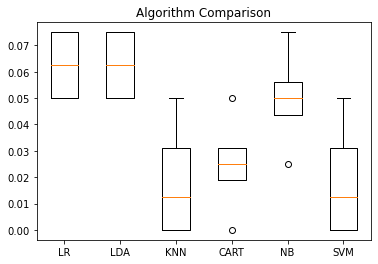

In [12]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Since the accuracy was based on predicting the number of points at the end of the season and not the position, the values are quite low. But it does appear Logistic Regression and LinearDiscriminantAnalysis provide the best results.

In [13]:
df = data.copy()
train = df[20:]
test = df[:20]
    
train_cols = ['W_x', 'D_x', 'L_x', 'GD_x', 'Pts_x']
lr = linear_model.LinearRegression()
lr.fit(train[train_cols], train["Pts_y"])
predictions = lr.predict(test[train_cols])
predictions

array([78.15022698, 69.2879008 , 67.32597026, 70.03693852, 57.87851008,
       53.9792166 , 58.15058678, 51.34690245, 50.39298043, 52.80730437,
       48.48513639, 47.38041656, 49.2882606 , 45.33488063, 44.31376621,
       44.85791962, 42.11743247, 36.92494786, 37.30519756, 32.45198207])

In [29]:
train = data
test = current_year

train_cols = ['W_x', 'D_x', 'L_x', 'GD_x', 'Pts_x']
lr = linear_model.LinearRegression()
lr.fit(train[train_cols], train["Pts_y"])
predictions = lr.predict(test[train_cols])
predictions

array([70.75556298, 71.10557771, 66.73213365, 66.48784901, 72.95049112,
       61.95624351, 65.25684185, 64.92323934, 60.63911314, 56.70500167,
       52.45369993, 50.4866442 , 47.90568221, 47.41391828, 43.14620431,
       37.89496247, 38.63420569, 34.48863404, 21.75520311, 18.64559066])

In [30]:
current_year1 = current_year.copy()
pred_pts = pd.DataFrame(predictions, columns = ["Pred_pts"])
current_year1["Pred_Pts"] = pred_pts
current_year1 = current_year1.drop(["Pos"], axis=1)

In [16]:
current_year1.sort_values("Pred_Pts", ascending=False, ignore_index=True)

,Team,Pld_x,W_x,D_x,L_x,GF_x,GA_x,GD_x,Pts_x,Pred_Pts
0,Manchester City,17,10,5,2,29,13,16,35,72.950491
1,Manchester United,17,11,3,3,34,24,10,36,71.105578
2,Liverpool,17,9,6,2,37,21,16,33,70.755563
3,Leicester City,17,10,2,5,31,21,10,32,66.732134
4,Tottenham Hotspur,17,8,6,3,30,16,14,30,66.487849
5,Everton,17,10,2,5,28,21,7,32,65.256842
6,Aston Villa,17,9,2,6,31,18,13,29,64.923239
7,Southampton,17,8,5,4,26,19,7,29,61.956244
8,Chelsea,17,7,5,5,32,21,11,26,60.639113
9,West Ham United,17,7,5,5,24,21,3,26,56.705002


In [33]:
train = data
test = current_year

train_cols = ['W_x', 'D_x', 'L_x', 'GD_x', 'Pts_x']
clf = LinearDiscriminantAnalysis()
clf.fit(train[train_cols], train["Pts_y"])
predictions = clf.predict(test[train_cols])

current_year1b = current_year.copy()
pred_pts = pd.DataFrame(predictions, columns = ["Pred_pts"])
current_year1b["Pred_Pts"] = pred_pts
current_year1b = current_year1b.drop(["Pos"], axis=1)
current_year1b.sort_values("Pred_Pts", ascending=False, ignore_index=True)

,Team,Pld_x,W_x,D_x,L_x,GF_x,GA_x,GD_x,Pts_x,Pred_Pts
0,Liverpool,17,9,6,2,37,21,16,33,75
1,Tottenham Hotspur,17,8,6,3,30,16,14,30,75
2,Chelsea,17,7,5,5,32,21,11,26,75
3,Leicester City,17,10,2,5,31,21,10,32,71
4,Manchester City,17,10,5,2,29,13,16,35,70
5,Everton,17,10,2,5,28,21,7,32,69
6,Manchester United,17,11,3,3,34,24,10,36,69
7,Southampton,17,8,5,4,26,19,7,29,66
8,Aston Villa,17,9,2,6,31,18,13,29,66
9,West Ham United,17,7,5,5,24,21,3,26,47


The results below are from the other models, the ones that did worse in our earlier validation test.

In [34]:
train = data
test = current_year
train_cols = ['W_x', 'D_x', 'L_x', 'GD_x', 'Pts_x']

knn = KNeighborsRegressor()
train_features = train[train_cols]
train_target = train['Pts_y']
knn.fit(train_features, train_target)
predictions = knn.predict(test[train_cols])
predictions

array([77. , 74.8, 63.4, 73. , 78.8, 59.2, 62.6, 60.8, 67.4, 55.8, 50.8,
       46.8, 45. , 46.8, 43.2, 35. , 37.8, 37.2, 29.6, 26.2])

In [36]:
current_year2 = current_year.copy()
pred_pts = pd.DataFrame(predictions, columns = ["Pred_pts"])
current_year2["Pred_Pts"] = pred_pts
current_year2 = current_year2.drop(["Pos"], axis=1)
current_year2.sort_values("Pred_Pts", ascending=False, ignore_index=True)

,Team,Pld_x,W_x,D_x,L_x,GF_x,GA_x,GD_x,Pts_x,Pred_Pts
0,Manchester City,17,10,5,2,29,13,16,35,78.8
1,Liverpool,17,9,6,2,37,21,16,33,77.0
2,Manchester United,17,11,3,3,34,24,10,36,74.8
3,Tottenham Hotspur,17,8,6,3,30,16,14,30,73.0
4,Chelsea,17,7,5,5,32,21,11,26,67.4
5,Leicester City,17,10,2,5,31,21,10,32,63.4
6,Everton,17,10,2,5,28,21,7,32,62.6
7,Aston Villa,17,9,2,6,31,18,13,29,60.8
8,Southampton,17,8,5,4,26,19,7,29,59.2
9,West Ham United,17,7,5,5,24,21,3,26,55.8


In [20]:
from sklearn.tree import DecisionTreeRegressor
train = data
test = current_year
train_cols = ['W_x', 'D_x', 'L_x', 'GD_x', 'Pts_x']
train_features = train[train_cols]
train_target = train['Pts_y']

dtr = DecisionTreeRegressor(min_samples_leaf=5)

dtr.fit(train_features, train_target)
dtr_predictions = dtr.predict(test[train_cols])
dtr_predictions

array([77.        , 73.33333333, 67.8       , 73.33333333, 77.        ,
       52.2       , 52.2       , 63.375     , 63.375     , 52.2       ,
       46.        , 44.42857143, 49.5       , 49.5       , 39.5       ,
       32.25      , 39.        , 45.6       , 28.44444444, 28.44444444])

In [21]:
current_year3 = current_year.copy()
pred_pts = pd.DataFrame(dtr_predictions, columns = ["Pred_pts"])
current_year3["Pred_Pts"] = pred_pts
current_year3 = current_year3.drop(["Pos"], axis=1)
current_year3.sort_values("Pred_Pts", ascending=False)

,Team,Pld_x,W_x,D_x,L_x,GF_x,GA_x,GD_x,Pts_x,Pred_Pts
0,Liverpool,17,9,6,2,37,21,16,33,77.000000
4,Manchester City,17,10,5,2,29,13,16,35,77.000000
3,Tottenham Hotspur,17,8,6,3,30,16,14,30,73.333333
1,Manchester United,17,11,3,3,34,24,10,36,73.333333
2,Leicester City,17,10,2,5,31,21,10,32,67.800000
7,Aston Villa,17,9,2,6,31,18,13,29,63.375000
8,Chelsea,17,7,5,5,32,21,11,26,63.375000
5,Southampton,17,8,5,4,26,19,7,29,52.200000
6,Everton,17,10,2,5,28,21,7,32,52.200000
9,West Ham United,17,7,5,5,24,21,3,26,52.200000


In [22]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)

reg.fit(train_features, train_target)
reg_predictions = reg.predict(test[train_cols])
reg_predictions

array([76.52453239, 66.63922393, 63.4128754 , 70.81137469, 77.07874222,
       60.34643955, 59.6868688 , 66.6592507 , 63.47202757, 55.57937087,
       49.11552932, 47.16170287, 45.60994341, 45.9550802 , 42.20681681,
       34.78617443, 38.81288759, 36.66136612, 30.30066956, 30.19867277])

In [23]:
current_year4 = current_year.copy()
pred_pts = pd.DataFrame(reg_predictions, columns = ["Pred_pts"])
current_year4["Pred_Pts"] = pred_pts
current_year4 = current_year4.drop(["Pos"], axis=1)
current_year4.sort_values("Pred_Pts", ascending=False)

,Team,Pld_x,W_x,D_x,L_x,GF_x,GA_x,GD_x,Pts_x,Pred_Pts
4,Manchester City,17,10,5,2,29,13,16,35,77.078742
0,Liverpool,17,9,6,2,37,21,16,33,76.524532
3,Tottenham Hotspur,17,8,6,3,30,16,14,30,70.811375
7,Aston Villa,17,9,2,6,31,18,13,29,66.659251
1,Manchester United,17,11,3,3,34,24,10,36,66.639224
8,Chelsea,17,7,5,5,32,21,11,26,63.472028
2,Leicester City,17,10,2,5,31,21,10,32,63.412875
5,Southampton,17,8,5,4,26,19,7,29,60.346440
6,Everton,17,10,2,5,28,21,7,32,59.686869
9,West Ham United,17,7,5,5,24,21,3,26,55.579371
